In [20]:
import pandas as pd
import numpy as np 
import zipfile

zf = zipfile.ZipFile('/Users/meera/Documents/drugs/Data/ethnicity_age.csv.zip') 
age_eth = pd.read_csv(zf.open('ethnicity_age.csv'))

age_eth.head()

#float("{0:.2f}".format(x))

age_eth['County_Code'] = age_eth['STATE']*1000 + age_eth['COUNTY']

age_eth.astype({'County_Code': float})

age_eth.to_csv("ethnicity_age.csv", index=False)

## Loading in the merged data to do EDA 

In [ ]:
import pandas as pd 
import numpy as np 

data_merged = pd.read_csv('/Users/meera/Documents/drugs/Data/od_deaths_merged.csv')

data_merged.columns
data_merged.head

#pull the years that are greater than 2010 

age_eth_data = data_merged[(data_merged.Year >= 2010) & (data_merged.Year <= 2019)]
age_eth_data = age_eth_data.iloc[:, 1:]
print(age_eth_data)
age_eth_data.columns

Columns to deal with are all the capitol ones.... 

AGEGRP : Age group 
    -they have categories of Total and then by every 4 years. 
    
TOT_POP : Total population \
TOT_MALE: Total Male \
TOT_FEMALE: Total Female \
WA_MALE: White alone Male \
WA_FEMALE: White alone Female \
BA_MALE: Black Alone Male \
BA_FEMALE: Black Alone Female \
IA_MALE: American Indian and Alaskan Native male population \
IA_FEMALE: American Indian and Alaskan Native female population \
AA_MALE: Asian Alone Male population \
AA_FEMALE: Asian Alone Female Population \
NA_MALE: Native Hawaiian and Other Pacific Islander alone \
NA_FEMALE: Native Hawaiian and Other Pacific Islander alone \ 
TOM_MALE: Two or More Races male ppln \
TOM_FEMALE: Two or more Races female ppln \
NH_MALE: Not Hispanic Male Population \
NH_FEMALE: Not Hispanic Female Population \
H_MALE: Hispanich Male \
H_FEMALE: Hispanic Female 

Questions: Does it look like areas with large groups of a certain race have more OD's? 

In [5]:
print(age_eth_data.dtypes)
age_eth_data

Year                 float64
State                 object
State Abv             object
State Code           float64
County                object
County Code          float64
Deaths               float64
Population           float64
Crude Rate            object
Cruder Rate          float64
Deathrate per 100    float64
Unemployment_rate    float64
Dispense_rate        float64
SUMLEV               float64
AGEGRP               float64
TOT_POP              float64
TOT_MALE             float64
TOT_FEMALE           float64
WA_MALE              float64
WA_FEMALE            float64
BA_MALE              float64
BA_FEMALE            float64
IA_MALE              float64
IA_FEMALE            float64
AA_MALE              float64
AA_FEMALE            float64
NA_MALE              float64
NA_FEMALE            float64
TOM_MALE             float64
TOM_FEMALE           float64
NH_MALE              float64
NH_FEMALE            float64
H_MALE               float64
H_FEMALE             float64
dtype: object


,Year,State,State Abv,State Code,County,County Code,Deaths,Population,Crude Rate,Cruder Rate,...,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,NH_MALE,NH_FEMALE,H_MALE,H_FEMALE
5902,2010.0,Alabama,AL,1.0,"Baldwin County, AL",1003.0,26.0,182265.0,14.26,14.264944,...,551.0,831.0,73.0,55.0,1196.0,1266.0,85166.0,89879.0,4454.0,3613.0
5903,2010.0,Alabama,AL,1.0,"Baldwin County, AL",1003.0,26.0,182265.0,14.26,14.264944,...,38.0,41.0,7.0,2.0,205.0,210.0,5068.0,5031.0,551.0,509.0
5904,2010.0,Alabama,AL,1.0,"Baldwin County, AL",1003.0,26.0,182265.0,14.26,14.264944,...,30.0,60.0,5.0,3.0,153.0,169.0,5445.0,5384.0,404.0,384.0
5905,2010.0,Alabama,AL,1.0,"Baldwin County, AL",1003.0,26.0,182265.0,14.26,14.264944,...,62.0,61.0,3.0,6.0,127.0,148.0,5791.0,5575.0,335.0,317.0
5906,2010.0,Alabama,AL,1.0,"Baldwin County, AL",1003.0,26.0,182265.0,14.26,14.264944,...,50.0,62.0,6.0,8.0,99.0,100.0,5608.0,5417.0,329.0,265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173762,2019.0,Wyoming,WY,56.0,"Natrona County, WY",56025.0,13.0,79858.0,Unreliable,16.278895,...,7.0,34.0,0.0,1.0,11.0,15.0,2175.0,2159.0,95.0,82.0
173763,2019.0,Wyoming,WY,56.0,"Natrona County, WY",56025.0,13.0,79858.0,Unreliable,16.278895,...,4.0,12.0,0.0,0.0,10.0,4.0,1523.0,1548.0,47.0,57.0
173764,2019.0,Wyoming,WY,56.0,"Natrona County, WY",56025.0,13.0,79858.0,Unreliable,16.278895,...,2.0,9.0,0.0,0.0,6.0,10.0,844.0,1103.0,22.0,40.0
173765,2019.0,Wyoming,WY,56.0,"Natrona County, WY",56025.0,13.0,79858.0,Unreliable,16.278895,...,2.0,5.0,0.0,0.0,6.0,10.0,602.0,749.0,28.0,34.0


# Going to Only look at the TOTALS for the age group 

In [63]:
#Removing all individuals that are less than 14 ? for this analysis
total_age = age_eth_data[age_eth_data.AGEGRP == 0 ]
total_age

#Want to see how overdoses change as race changes 

# Analyze the deathrate by year 
ods_year = total_age.groupby("Year")
ods_year_sums = ods_year.sum()  
ods_year_means = ods_year.mean()
years = ods_year_means.index.values 

#take the population and the race numbers from this one 
ods_year_sums

#take the cruder rate from the ods_year means 
ods_year_means



,State Code,County Code,Deaths,Population,Cruder Rate,Deathrate per 100,Unemployment_rate,Dispense_rate,SUMLEV,AGEGRP,...,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,NH_MALE,NH_FEMALE,H_MALE,H_FEMALE
Year,,,,,,,,,,,,,,,,,,,,,
2010.0,29.520566,29609.907455,42.068123,320799.798201,18.048078,0.018048,9.869794,104.834961,50.0,0.0,...,8954.732648,9834.789203,407.134961,397.114396,3835.086118,3996.224936,127329.071979,134361.757069,30201.724936,29597.592545
2011.0,30.240050,30330.462687,44.151741,316892.825871,18.898084,0.018898,9.005348,104.139677,50.0,0.0,...,8975.235075,9861.910448,403.680348,393.420398,3867.215174,4021.324627,125322.345771,132103.347015,29999.366915,29463.961443
2012.0,29.869674,29960.238095,44.847118,321512.358396,18.319839,0.018320,8.206140,104.281932,50.0,0.0,...,9308.808271,10229.543860,412.917293,403.528822,4017.012531,4170.111529,126955.755639,133707.426065,30634.000000,30163.365915
2013.0,30.175676,30265.359951,46.781327,320574.276413,18.337875,0.018338,7.476167,99.049754,50.0,0.0,...,9414.068796,10344.174447,415.131450,405.131450,4093.546683,4238.998771,126606.157248,133217.178133,30577.452088,30112.944717
2014.0,30.594626,30685.793224,48.343458,310182.310748,20.294289,0.020294,6.309813,96.348598,50.0,0.0,...,9246.780374,10157.335280,401.151869,392.282710,4039.140187,4172.953271,122236.664720,128451.280374,29689.603972,29266.271028
2015.0,30.534989,30623.669300,52.496614,305658.584650,21.693002,0.021693,5.539955,89.287472,50.0,0.0,...,9243.607223,10148.990971,395.182844,386.507901,4048.916479,4173.413093,120031.597065,126040.413093,29610.538375,29214.055305
2016.0,30.512500,30601.242708,60.439583,288510.078125,25.372938,0.025373,5.145208,82.443646,50.0,0.0,...,8841.090625,9697.043750,377.863542,369.472917,3910.200000,4019.181250,113635.335417,119205.703125,27962.139583,27589.253125
2017.0,30.506639,30598.918284,65.819203,286529.480082,27.561521,0.027562,4.577630,74.023926,50.0,0.0,...,8891.446374,9749.104188,373.939734,365.991828,3940.557712,4043.121553,112329.203269,117826.941777,28013.385087,27652.257406
2018.0,30.786299,30875.196319,63.169734,288160.408998,25.691622,0.025692,4.106442,64.474029,50.0,0.0,...,9083.085890,9952.470348,383.243354,375.508180,4054.893661,4156.209611,112727.893661,118253.246421,28545.939673,28199.662577


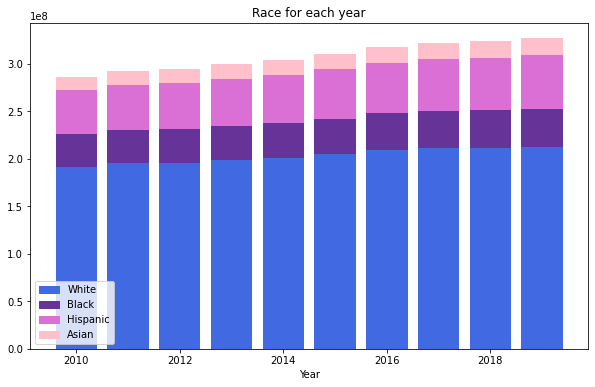

,AA_FEMALE,AA_MALE,WA_FEMALE,WA_MALE,BA_FEMALE,BA_MALE,H_FEMALE,H_MALE,Population,Cruder Rate
Year,,,,,,,,,,
2010.0,7651466.0,6966782.0,96987246.0,94606114.0,18117135.0,16268500.0,23026927.0,23496942.0,249582243.0,18.048078
2011.0,7928976.0,7216089.0,98698637.0,96315089.0,18348508.0,16506279.0,23689025.0,24119491.0,254781832.0,18.898084
2012.0,8163176.0,7428429.0,98942940.0,96608583.0,18615682.0,16756024.0,24070366.0,24445932.0,256566862.0,18.319839
2013.0,8420158.0,7663052.0,100215682.0,97928148.0,19080626.0,17203822.0,24511937.0,24890046.0,260947461.0,18.337875
2014.0,8694679.0,7915244.0,101712970.0,99466880.0,19237233.0,17381555.0,25051928.0,25414301.0,265516058.0,20.294289
2015.0,8992006.0,8189836.0,103382574.0,101157424.0,19662838.0,17790003.0,25883653.0,26234937.0,270813506.0,21.693002
2016.0,9309162.0,8487447.0,105811465.0,103595142.0,20057342.0,18174134.0,26485683.0,26843654.0,276969675.0,25.372938
2017.0,9544373.0,8704726.0,106616666.0,104401029.0,20419969.0,18510155.0,27071560.0,27425104.0,280512361.0,27.561521
2018.0,9733516.0,8883258.0,106782968.0,104576217.0,20673211.0,18734795.0,27579270.0,27917929.0,281820880.0,25.691622


In [99]:
#Some sort of bar graphs comparing year and then race as well see how OD's have 
#increased and see how race has also increased too 
#this will allow us to explore the realtionship between how race ppln is changing and how the OD's are changing 

import matplotlib.pyplot as plt

grouped_yr_frame = pd.DataFrame([ods_year_sums.AA_FEMALE, ods_year_sums.AA_MALE, ods_year_sums.WA_FEMALE, 
                                ods_year_sums.WA_MALE, ods_year_sums.BA_FEMALE, ods_year_sums.BA_MALE,
                                ods_year_sums.H_FEMALE, ods_year_sums.H_MALE,
                                ods_year_sums.Population, ods_year_means['Cruder Rate']]).transpose()

#Don't be fooled this is the Cruder Rate for each year and then the population overal


grouped_yr_frame

#Making a stacked bar graph for each year ? 
#After this do some sort of Age analysis I think............ yes yes yes 
# do a combined sex plot so put females and males the same color .... 

figure, axes = plt.subplots(figsize=(10,6))
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
plt.title("Race for each year")
plt.xlabel("Year")

plt.bar(x, grouped_yr_frame.WA_FEMALE, color = 'royalblue')
plt.bar(x, grouped_yr_frame.WA_MALE, bottom = grouped_yr_frame.WA_FEMALE, color = 'royalblue')

plt.bar(x, grouped_yr_frame.BA_MALE, bottom = grouped_yr_frame.WA_FEMALE + 
        grouped_yr_frame.WA_MALE, color = 'rebeccapurple')
plt.bar(x, grouped_yr_frame.BA_FEMALE, bottom = grouped_yr_frame.WA_FEMALE + 
        grouped_yr_frame.WA_MALE + grouped_yr_frame.BA_MALE,color = 'rebeccapurple')

plt.bar(x, grouped_yr_frame.H_FEMALE, bottom = grouped_yr_frame.WA_FEMALE + 
        grouped_yr_frame.WA_MALE + grouped_yr_frame.BA_MALE + grouped_yr_frame.BA_FEMALE, color = 'orchid')
plt.bar(x, grouped_yr_frame.H_MALE, bottom = grouped_yr_frame.WA_FEMALE + 
        grouped_yr_frame.WA_MALE + grouped_yr_frame.BA_MALE + grouped_yr_frame.BA_FEMALE +
        grouped_yr_frame.H_FEMALE, color = 'orchid')

plt.bar(x, grouped_yr_frame.AA_FEMALE, bottom = grouped_yr_frame.WA_FEMALE + 
        grouped_yr_frame.WA_MALE + grouped_yr_frame.BA_MALE + grouped_yr_frame.BA_FEMALE +
        grouped_yr_frame.H_FEMALE + grouped_yr_frame.H_MALE, color = 'pink')
plt.bar(x, grouped_yr_frame.AA_MALE, bottom = grouped_yr_frame.WA_FEMALE + 
        grouped_yr_frame.WA_MALE + grouped_yr_frame.BA_MALE + grouped_yr_frame.BA_FEMALE +
        grouped_yr_frame.H_FEMALE + grouped_yr_frame.H_MALE + grouped_yr_frame.AA_MALE,
        color = 'pink')

xint = range(int(min(grouped_yr_frame['Population'])), int(max(grouped_yr_frame['Year']))+1)

colors = {'White':'royalblue', 'Black':'rebeccapurple', 'Hispanic':'orchid', 'Asian':'pink'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()

grouped_yr_frame

In [42]:
#maybe make a plot of percentage of white male and females vs deaths ? 

#Dealing with the white alone columns 
#total_age["white_malep"] = total_age['WA_MALE'] / total_age['Population']
white_male_percent = total_age.WA_MALE / total_age.Population
white_female_percent = total_age.WA_FEMALE / total_age.Population
black_female_percent = total_age.BA_FEMALE / total_age.Population
black_male_percent = total_age.BA_MALE / total_age.Population
asian_male_percent = total_age.AA_MALE / total_age.Population
asian_female_percent = total_age.AA_FEMALE / total_age.Population
hispanic_female_percent = total_age.H_FEMALE / total_age.Population
hispanic_male_pecent = total_age.H_MALE / total_age.Population

cruder_rate = total_age['Cruder Rate']

proportions = pd.DataFrame([white_male_percent, white_female_percent, cruder_rate, black_female_percent, 
                           black_male_percent, asian_female_percent, asian_male_percent,
                           hispanic_female_percent, hispanic_male_pecent]).transpose()

proportions = proportions.rename(columns={'Unnamed 0':'white_M', 'Unnamed 1':'white_F', 
                                          'Cruder Rate':'cruder_rate', 'Unnamed 2':'black_F',
                                         'Unnamed 3':'black_M', 'Unnamed 4': 'asian_F', 'Unnamed 5': 'asian_M',
                                         'Unnamed 6': 'hispanic_F', 'Unnamed 7': 'hispanic_M'})

proportions

,white_M,white_F,cruder_rate,black_F,black_M,asian_F,asian_M,hispanic_F,hispanic_M
5902,0.431882,0.448561,14.264944,0.048896,0.046207,0.004559,0.003023,0.019823,0.024437
5921,0.478263,0.488381,17.445309,0.006821,0.007397,0.001448,0.000837,0.036356,0.045079
5940,0.372137,0.391188,17.710758,0.110819,0.095528,0.004411,0.003163,0.015004,0.017938
5959,0.435603,0.445455,25.204500,0.050317,0.049195,0.001948,0.001466,0.033201,0.045368
5978,0.317675,0.311595,26.096714,0.147212,0.172708,0.001592,0.000992,0.007177,0.011822
...,...,...,...,...,...,...,...,...,...
173672,0.457957,0.459958,11.634198,0.008766,0.016259,0.015962,0.014624,0.021442,0.022128
173691,0.466047,0.480842,16.438581,0.004370,0.005247,0.010356,0.009480,0.015466,0.016356
173710,0.372660,0.364509,28.017626,0.002445,0.003770,0.003031,0.002140,0.032475,0.037544
173729,0.463226,0.455286,16.080402,0.009970,0.015256,0.007065,0.006523,0.072523,0.076653


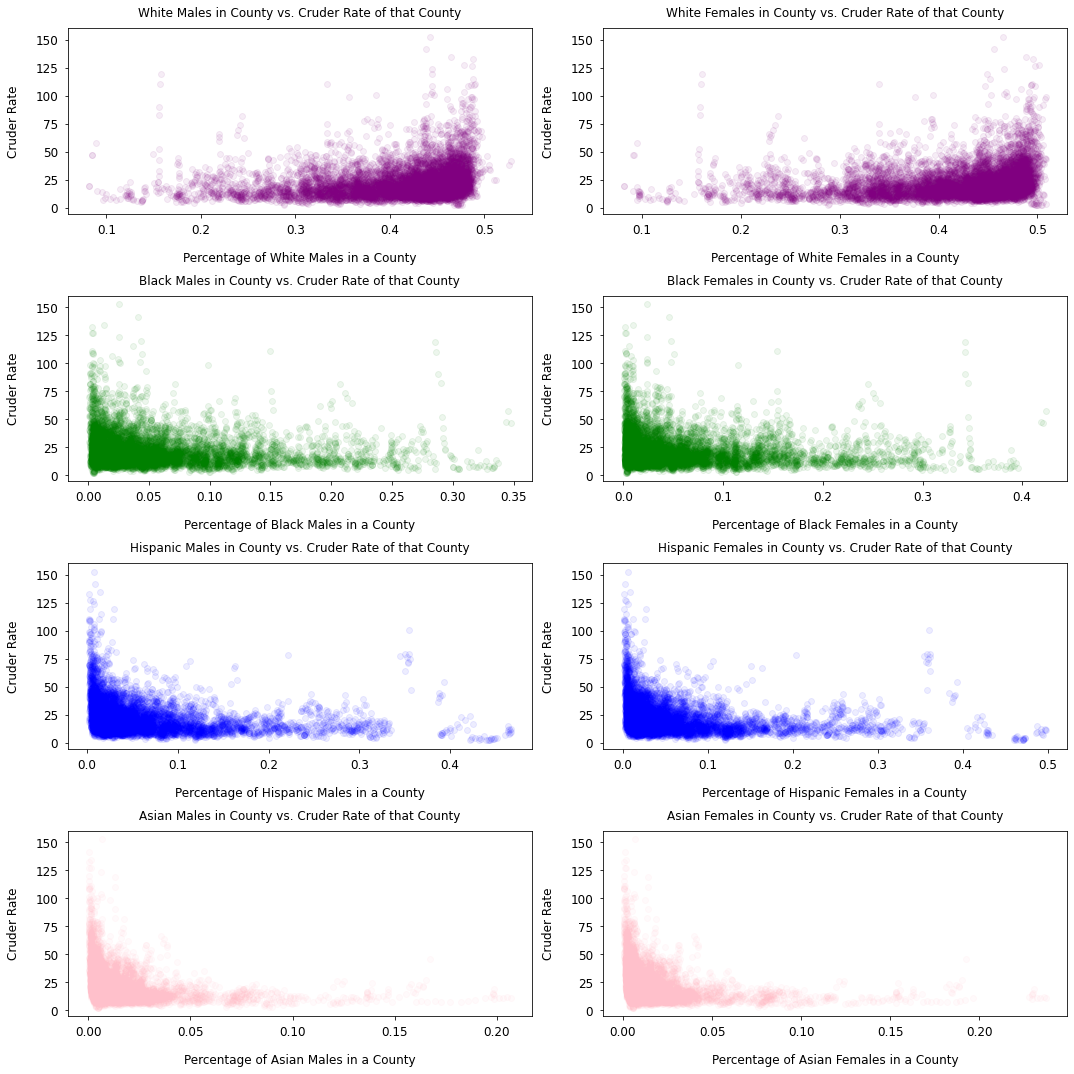

In [61]:
##Make a plot now for female and male 
import matplotlib.pyplot as plt 

#xint = range((min(proportions['cruder_rate'])), (max(proportions['cruder_rate']))+.1)



#fig, ax = plt.subplots(figsize=(15,10)) 

figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15 ))
plt.subplot(4,2,1)
plt.scatter(proportions['white_M'], proportions['cruder_rate'], alpha=0.07, color='purple')
plt.title("White Males in County vs. Cruder Rate of that County", y=1.03)
plt.xlabel("Percentage of White Males in a County", fontsize=12, labelpad=15)
plt.ylabel("Cruder Rate", fontsize=12, labelpad=15) 
plt.tick_params(labelsize=12, pad=6); 


plt.subplot(4,2,2)
plt.scatter(proportions['white_F'], proportions['cruder_rate'], alpha=0.07, color='purple')
plt.title("White Females in County vs. Cruder Rate of that County", y=1.03)
plt.xlabel("Percentage of White Females in a County", fontsize=12, labelpad=15)
plt.ylabel("Cruder Rate", fontsize=12, labelpad=15)
plt.tick_params(labelsize=12, pad=6); 


plt.subplot(4,2,3)
plt.scatter(proportions['black_M'], proportions['cruder_rate'], alpha=0.07, color='green')
plt.title("Black Males in County vs. Cruder Rate of that County", y=1.03)
plt.xlabel("Percentage of Black Males in a County", fontsize=12, labelpad=15)
plt.ylabel("Cruder Rate", fontsize=12, labelpad=15)
plt.tick_params(labelsize=12, pad=6); 

plt.subplot(4,2,4)
plt.scatter(proportions['black_F'], proportions['cruder_rate'], alpha=0.07, color='green')
plt.title("Black Females in County vs. Cruder Rate of that County", y=1.03)
plt.xlabel("Percentage of Black Females in a County", fontsize=12, labelpad=15)
plt.ylabel("Cruder Rate", fontsize=12, labelpad=15)
plt.tick_params(labelsize=12, pad=6); 


plt.subplot(4,2,5)
plt.scatter(proportions['hispanic_M'], proportions['cruder_rate'], alpha=0.07, color='blue')
plt.title("Hispanic Males in County vs. Cruder Rate of that County", y=1.03)
plt.xlabel("Percentage of Hispanic Males in a County", fontsize=12, labelpad=15)
plt.ylabel("Cruder Rate", fontsize=12, labelpad=15)
plt.tick_params(labelsize=12, pad=6); 

plt.subplot(4,2,6)
plt.scatter(proportions['hispanic_F'], proportions['cruder_rate'], alpha=0.07, color='blue')
plt.title("Hispanic Females in County vs. Cruder Rate of that County", y=1.03)
plt.xlabel("Percentage of Hispanic Females in a County", fontsize=12, labelpad=15)
plt.ylabel("Cruder Rate", fontsize=12, labelpad=15)
plt.tick_params(labelsize=12, pad=6); 

plt.subplot(4,2,7)
plt.scatter(proportions['asian_M'], proportions['cruder_rate'], alpha=0.07, color='pink')
plt.title("Asian Males in County vs. Cruder Rate of that County", y=1.03)
plt.xlabel("Percentage of Asian Males in a County", fontsize=12, labelpad=15)
plt.ylabel("Cruder Rate", fontsize=12, labelpad=15)
plt.tick_params(labelsize=12, pad=6); 

plt.subplot(4,2,8)
plt.scatter(proportions['asian_F'], proportions['cruder_rate'], alpha=0.07, color='pink')
plt.title("Asian Females in County vs. Cruder Rate of that County", y=1.03)
plt.xlabel("Percentage of Asian Females in a County", fontsize=12, labelpad=15)
plt.ylabel("Cruder Rate", fontsize=12, labelpad=15)
plt.tick_params(labelsize=12, pad=6); 

figure.tight_layout(pad = 1)




A bar graph for each year grouping by year and each individual year no .... ? 

Also make some sort of correlation matrix ... ? 